In [4]:
from finlab.data import Data
import pandas as pd
import talib
import matplotlib.pyplot as plt
import numpy as ny

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows',  None)
#pd.reset_option('all')

data = Data()


close = data.get('收盤價',1000)
high = data.get('最高價',1000)
low = data.get('最低價',1000)

# print(type(high['0050'].ffill().values))
# print(high['0050'].ffill().values)

kd = talib.STOCH(high['0050'].ffill().values, 
                 low['0050'].ffill().values, 
                 close['0050'].ffill().values,
                 fastk_period=9, slowk_period=3
                 , slowd_period=3, slowk_matype=1, slowd_matype=1
                )
#k = pd.Series(kd[0])

k = pd.Series(kd[0] , index = close['0050'].index)
d = pd.Series(kd[1] , index = close['0050'].index)

condition = (k > d) & (k.shift()< d.shift()) & (k < 30)
#設定條件
#d不用小於30??????????????????????????????


#plt.style.use('default')

plt.rcParams["figure.figsize"] = (25,10)
#改圖片大小
#k['2020'].plot()
#d['2020'].plot()
#k是藍色
#d是黃色


arr = [30]
for v, p in zip(condition[1:], close['0050'].shift(-1)/close['0050'].shift(0)):
    arr.append(arr[-1]*p + v)
#回測寫法
#最後一天是nan 數字+nan 為nan
#總共會出現到最後一個資料為止的所有價格（包含一開第一天的30）
#不管buy是從0開始或者從1開始，都不影響資料總是，因為從0開始的話， close['0050'].shift(-2)/close['0050'].shift(-1))為nan值
#此處也可以是close['0050'].shift(-2)/close['0050'].shift(-1)，變成看到訊號後隔天收盤價買，但我自己偏向當日操作，避免隔日開盤後價格漂浮
#close['0050'].shift(-1)/close['0050'].shift(0)明天除以今天的價格






<font color=steel size=5 face=雅黑>策略與回測：KD值策略vs將錢放在銀行(未考量利率)vs0050</font>

<AxesSubplot:xlabel='date'>

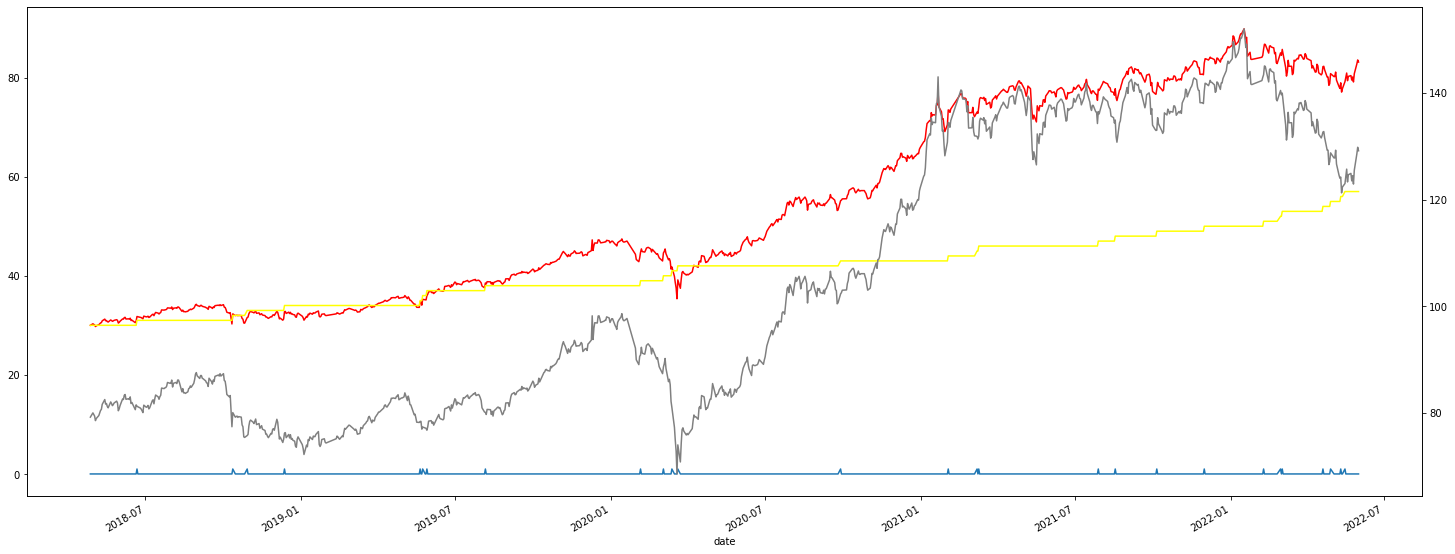

In [5]:
# 畫圖
#%matplotlib inline

# 先畫出 0050 收盤價
close['0050'].plot(secondary_y=True, color='gray')

# 畫出投資獲利
pd.Series(arr, index=close['0050'].index).plot(color='red')

# # 畫出買入的時間點
condition.astype(int).plot()

# # 畫出一樣的金額假如放在銀行，的資產變化
(condition.astype(int).cumsum() + 30).plot(color='yellow')


In [6]:
close['0050'].index


DatetimeIndex(['2018-04-27', '2018-04-30', '2018-05-02', '2018-05-03',
               '2018-05-04', '2018-05-07', '2018-05-08', '2018-05-09',
               '2018-05-10', '2018-05-11',
               ...
               '2022-05-19', '2022-05-20', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-30',
               '2022-05-31', '2022-06-01'],
              dtype='datetime64[ns]', name='date', length=1000, freq=None)

<font color=steel size=5 face=雅黑>只想看近3年的圖表作法：</font>



<AxesSubplot:xlabel='date'>

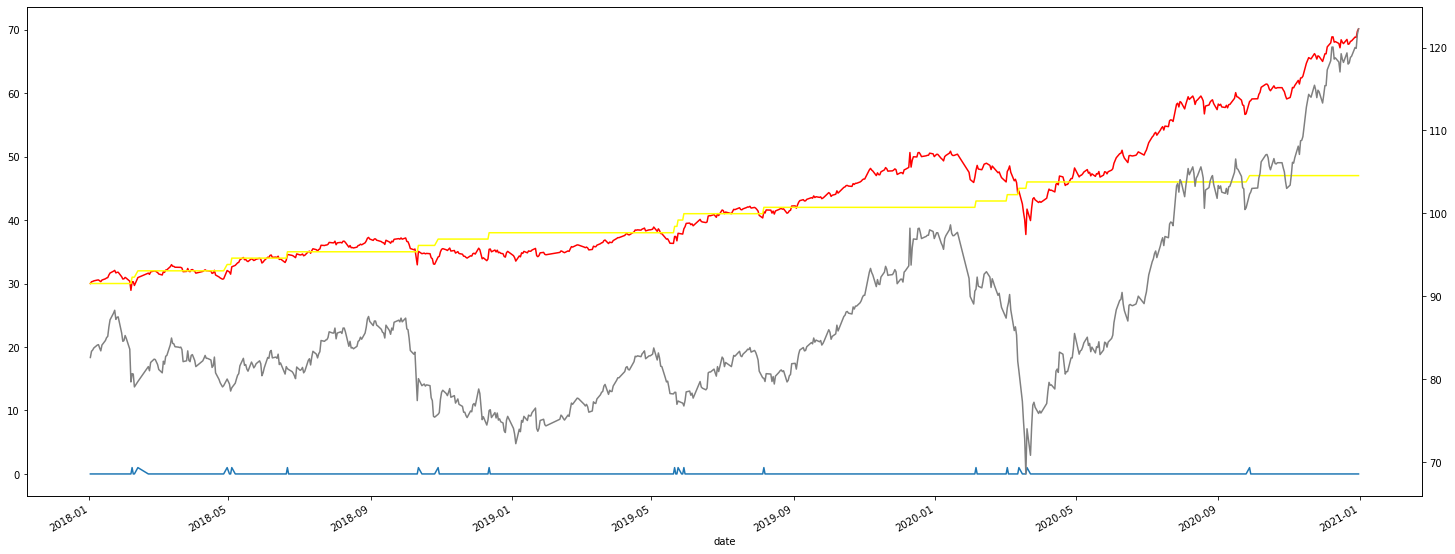

In [7]:

#只選2018~2021的方法
def select_range(df):
    cond1=df.index.get_level_values('date') <= '2021'
    cond2=df.index.get_level_values('date') >= '2018'
    df=df[cond1 & cond2]
    return df

data = Data()


close = data.get('收盤價',2000)
high = data.get('最高價',2000)
low = data.get('最低價',2000)

close = select_range(close)
high=select_range(high)
low=select_range(low)

kd = talib.STOCH(high['0050'].ffill().values, 
                 low['0050'].ffill().values, 
                 close['0050'].ffill().values,
                 fastk_period=9, slowk_period=3
                 , slowd_period=3, slowk_matype=1, slowd_matype=1
                )
#k = pd.Series(kd[0])

k = pd.Series(kd[0] , index = close['0050'].index)
d = pd.Series(kd[1] , index = close['0050'].index)


condition = (k > d) & (k.shift()< d.shift()) & (k < 30)
#設定條件




plt.rcParams["figure.figsize"] = (25,10)


arr = [30]
for v, p in zip(condition[1:], close['0050'].shift(-1)/close['0050'].shift(0)):
    arr.append(arr[-1]*p + v)
#回測寫法



# 畫圖
#%matplotlib inline

# 先畫出 0050 收盤價
close['0050'].plot(secondary_y=True, color='gray')

# 畫出投資獲利
pd.Series(arr, index=close['0050'].index).plot(color='red')

# # 畫出買入的時間點
condition.astype(int).plot()

# # 畫出一樣的金額假如放在銀行，的資產變化
(condition.astype(int).cumsum() + 30).plot(color='yellow')

